### Telecom churn prediction:
**Faseela K Karim**

## Introduction


This Jupyter Notebook explores the use of random forest and XGBoost for predicting customer churn. Customer churn is a crucial problem for many businesses including telecom companies, as losing customers can have a significant impact on revenue and profitability. Machine learning models such as random forest and XGBoost can be used to predict which customers are likely to churn, allowing businesses to take proactive measures to retain those customers.

 We have done preprocessing the data, including handling missing values, encoding categorical variables, and scaling numerical features. We will now train a Random Forest classifier and XGBoost on the preprocessed data and evaluate its performance using various metrics. We will also visualize the feature importance of the Random Forest and XGBoost model to gain insights into which features are most relevant in predicting customer churn.

Finally, we will discuss the results obtained from the Random Forest model and XGBoost and provide recommendations for future research and practical applications of the model in a business context.

## Table of Contents
1. [Random Forest](#forest)
2. [Random Forest-Hyper parameter tuning](#hyper)
3. [Random Forest Evaluation](#eval)
4. [Grid Search on XGBoost](#gridxg)
5. [XGBoost](#xg)
6. [Conclusion](#con)



In [1]:
#import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


**Reading Data From Google Drive**



In [ ]:
# #connecting to ggogle drive
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# #uploading the dataset
# #output of onehot encoding used here,no columns deleted based on collinearity
# df_train=pd.read_csv('/content/drive/My Drive/final_capstone/train_data_onehot.csv',index_col=0)
# df_test=pd.read_csv('/content/drive/My Drive/final_capstone/test_data_onehot.csv',index_col=0)

In [2]:
df_train=pd.read_csv('data/train_data_onehot.csv',index_col=0)
df_test=pd.read_csv('data/test_data_onehot.csv',index_col=0)

Reading data from local drive

In [ ]:
# df_train=pd.read_csv('train_data_onehot.csv',index_col=0)
# df_test=pd.read_csv('test_data_onehot.csv',index_col=0)


In [ ]:
#seperating target variable from test and train data
X_train =df_train.drop('churn',axis=1)
X_test=df_test.drop('churn',axis=1)
y_train=df_train.churn
y_test=df_test.churn

In [ ]:
#check the number of rows and columns of train  data
X_train.shape

(75000, 125)

In [ ]:
#check the number of rows and columns of test  data
X_test.shape

(25000, 125)

**Scaling**  **Data** 

In this code block, the StandardScaler from the sklearn.preprocessing module is used to scale the variables in the training and test data sets. This is done to ensure that all the variables are on the same scale before fitting the Random Forest model. The fit_transform() method is used on the training data, and the transform() method is used on the test data, to ensure that the same scaling is applied to both data sets. 

In [ ]:
# scaler=StandardScaler()
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

###  **Random** **Forest** <a name="forest"></a>

The code below is training a Random Forest classifier model with different number of estimators (trees) ranging from 5 to 100 with a step size of 5, and evaluating its accuracy on both the training and testing datasets. The accuracy scores are then plotted against the number of estimators used, to visualize how accuracy changes as the number of trees in the Random Forest model increases. The plot shows the trend in accuracy improvement on training and test datasets as more trees are added to the model, and also indicates if the model is overfitting or underfitting the data.All parameters except n_estimatorsis set to default value.

**model 1**

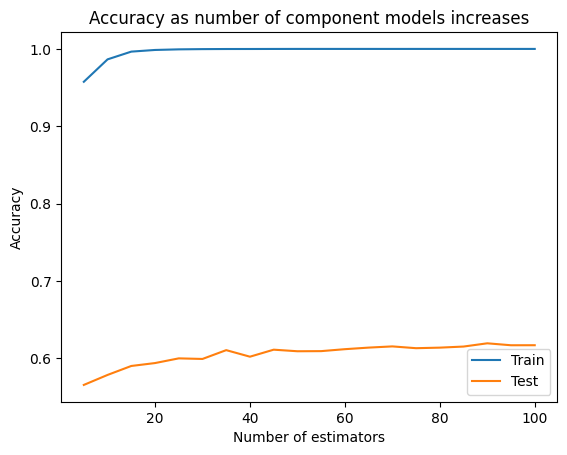

In [ ]:

from sklearn.ensemble import RandomForestClassifier
# Initialize empty lists to store accuracy scores
train_scores = []
test_scores = []
# Define the range of estimator values we want to test
n_range = range(5, 101, 5) #min, max, step size
# Loop over different numbers of estimators
for n in n_range:
  # Create a random forest classifier with n estimators
    RF_model = RandomForestClassifier(n_estimators = n)
     # Fit the model on the training set
    RF_model.fit(X_train, y_train)
    # Append the accuracy scores to the lists
    train_scores.append(RF_model.score(X_train, y_train))
    test_scores.append(RF_model.score(X_test, y_test))

# Plot the accuracy scores as a function of the number of estimators   
plt.plot(n_range, train_scores, label = 'Train')
plt.plot(n_range, test_scores, label = 'Test')
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy as number of component models increases")
plt.legend();

In this code, a Random Forest classifier model is trained with different numbers of estimators ranging from 5 to 100 with a step size of 5. The accuracy of the model is then evaluated on both the training and testing datasets, and the scores are plotted against the number of estimators used. The plot shows the trend in accuracy improvement on both datasets as more trees are added to the model. The test_scores list contains the accuracy scores for each value of n_estimators, ranging from 0.5639 to 0.61924.

In [ ]:
#display the test score for different n_estimator values
test_scores

[0.56528,
 0.5782,
 0.5898,
 0.59356,
 0.59964,
 0.59888,
 0.61028,
 0.6018,
 0.61088,
 0.60884,
 0.609,
 0.61152,
 0.61356,
 0.61512,
 0.6128,
 0.61352,
 0.61492,
 0.61912,
 0.6166,
 0.61664]

**model 2**

This code given below is training multiple random forest classifiers with a different number of estimators, ranging from 5 to 100 with steps of 5 and max_depth set to 20, and for each number of estimators, it measures the accuracy on the training and test sets. It then plots the accuracy scores against the number of estimators on a graph, which allows the user to visually inspect the accuracy score trend as the number of estimators increases. The addition of the max_depth parameter=20 sets a maximum depth limit for each tree in the forest.

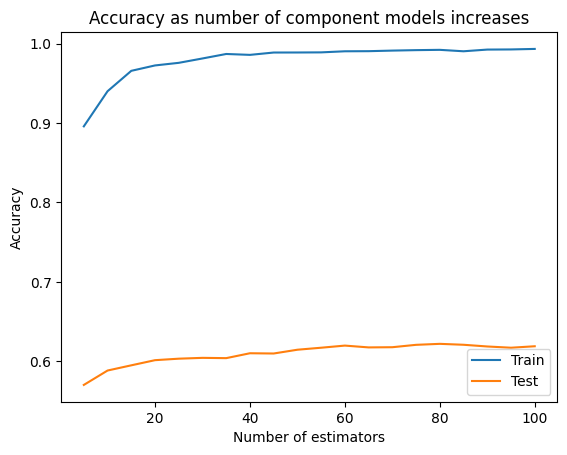

In [ ]:
# initialize empty lists to store train and test scores
train_scores = []
test_scores = []

# define range of estimators to test
n_range = range(5, 101, 5)

# loop through the range of estimators and fit random forest models with varying number of estimators
for n in n_range:
    RF_model = RandomForestClassifier(n_estimators = n, max_depth = 20)
    RF_model.fit(X_train, y_train)
    train_scores.append(RF_model.score(X_train, y_train))
    test_scores.append(RF_model.score(X_test, y_test))
    
# plot the accuracy scores against number of estimators for both train and test sets
plt.plot(n_range, train_scores, label = 'Train')
plt.plot(n_range, test_scores, label = 'Test')
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy as number of component models increases")
plt.legend()


In [ ]:
#display the test score for different n_estimator values
test_scores

[0.57024,
 0.58836,
 0.59492,
 0.6014,
 0.60328,
 0.60432,
 0.60396,
 0.61012,
 0.6098,
 0.61456,
 0.61708,
 0.61976,
 0.61748,
 0.61772,
 0.62072,
 0.62196,
 0.6208,
 0.61864,
 0.61708,
 0.61892]

**model 3**

The below code tune the max_depth of the Random Forest classifier from 5 to 100 in steps of 10. This code loops over values of max_depth from 5 to 100 in steps of 10, creates a Random Forest classifier object with the specified max_depth, trains the classifier on the training data,calculates the accuracy of the classifier on the test data, and appends the accuracy to a list. The accuracy and max_depth are printed for each iteration of the loop. Finally, the accuracies vs max_depth are plotted to visualize the relationship between the two.

Max Depth: 5, Accuracy: 0.5922
Max Depth: 15, Accuracy: 0.62144
Max Depth: 25, Accuracy: 0.62328
Max Depth: 35, Accuracy: 0.62244
Max Depth: 45, Accuracy: 0.6218
Max Depth: 55, Accuracy: 0.623
Max Depth: 65, Accuracy: 0.623
Max Depth: 75, Accuracy: 0.623
Max Depth: 85, Accuracy: 0.623
Max Depth: 95, Accuracy: 0.623


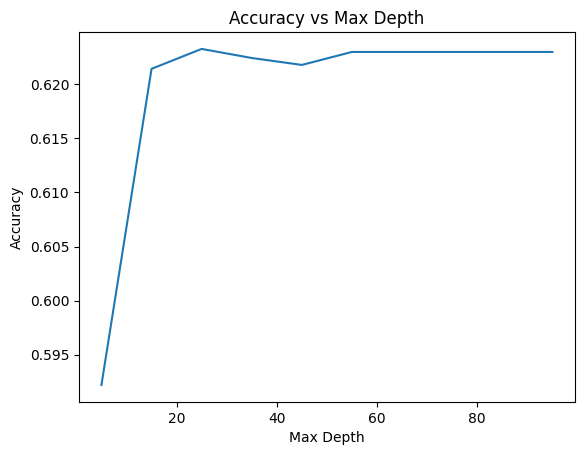

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define a list to store the accuracies for each value of max_depth
accuracies = []

# Loop over the values of max_depth
for max_depth in range(5, 101, 10):

    # Create a Random Forest classifier object
    rf_clf = RandomForestClassifier(n_estimators=300, max_depth=max_depth, random_state=42)

    # Train the classifier on the training data
    rf_clf.fit(X_train, y_train)

    # Predict the class labels of the test data
    y_pred = rf_clf.predict(X_test)

    # Calculate the accuracy of the classifier on the test data
    accuracy = accuracy_score(y_test, y_pred)

    # Append the accuracy to the list
    accuracies.append(accuracy)

    # Print the accuracy and max_depth
    print(f"Max Depth: {max_depth}, Accuracy: {accuracy}")

# Plot the accuracies vs max_depth
plt.plot(range(5, 101, 10), accuracies)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.show()


Maximum accuracy of 62.3 % is obtained for a max_depth of 25

### **Random Forest-Hyper parameter tuning** <a name="hyper"></a>

The below given code performs hyperparameter tuning for a Random Forest classifier by defining a parameter grid, setting up a GridSearchCV object with 5-fold cross-validation, and fitting the object to the training data to find the best hyperparameters for the model. The best parameters found are printed, and the best estimator is used to predict on the test set and evaluate the model's accuracy. The commented out lines show additional hyperparameters that can be included in the grid search. The goal of hyperparameter tuning is to optimize the model's performance by finding the best combination of hyperparameters that maximizes a chosen performance metric

In [ ]:
# Define the random forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100],
    # 'criterion': ['gini', 'entropy'],
    'max_depth': [15,20,25],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'max_features': ['auto', 'sqrt', 'log2', 0.1, 0.3, 0.5],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'bootstrap': [True, False],
    # 'oob_score': [False, True],
    # 'n_jobs': [-1],
    # 'warm_start': [False, True],
    # 'class_weight': [None, 'balanced', 'balanced_subsample'],
    # 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'max_samples': [None, 0.1, 0.3, 0.5, 0.7, 0.9]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator for predictions and evaluation
best_rf_clf = grid_search.best_estimator_
y_pred = best_rf_clf.predict(X_test)

# Evaluate the model (using accuracy or other appropriate metrics)
print("Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best parameters found:  {'max_depth': 20, 'max_leaf_nodes': None, 'min_samples_leaf': 15, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.6285


The accuracy reaches maximum around Max depth=60 and stays almost same after that.

### **Random Forest Evaluation**<a name="eval"></a>

Below given code creates a RandomForestClassifier object with specified hyperparameters, trains the classifier on the training data, predicts the class labels of the test data using the trained classifier, and then calculates the accuracy of the classifier on the test data.

The pameters of the classifier are set based on the result obtained from hyper parameter tuning .
n_estimators is set to 100 which is the number of trees in the forest, max_depth is set to 20 which is the maximum depth of the tree. random_state is set to 42 for reproducibility of the results.

The predicted class labels of the test data are stored in y_pred and the accuracy of the classifier on the test data is printed.

Accuracy: 0.62188


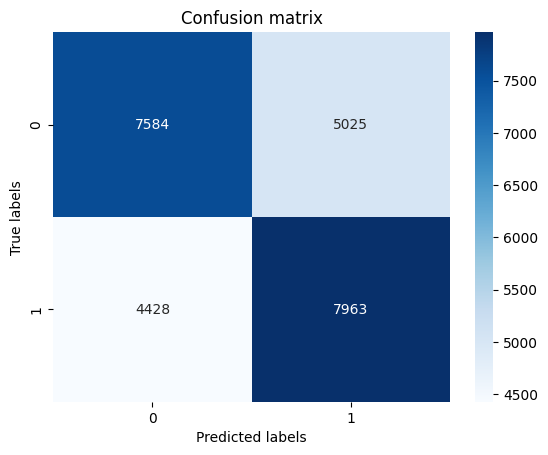

In [ ]:

from sklearn.metrics import confusion_matrix

# Create a Random Forest classifier object
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42,min_samples_leaf=15,min_samples_split=2,)

# Train the classifier on the training data
rf_clf.fit(X_train, y_train)

# Predict the class labels of the test data
y_pred = rf_clf.predict(X_test)

# Calculate the accuracy of the classifier on the test data
accuracy = rf_clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()


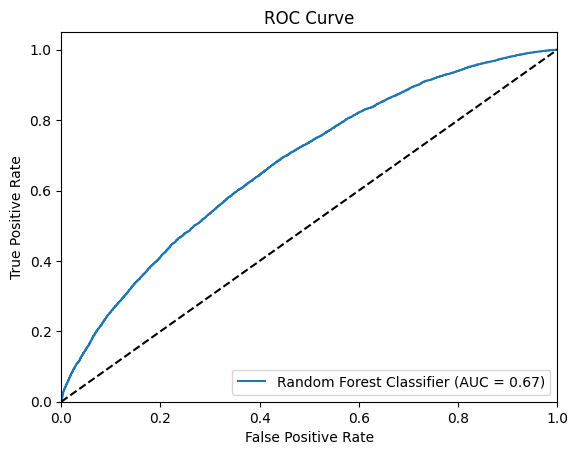

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the predicted probabilities of the class labels for the test data
y_pred_proba = rf_clf.predict_proba(X_test)[:,1]

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'Random Forest Classifier (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Grid Search on XGBoost <a name="gridxg"></a>

This code performs a grid search with cross-validation to find the best hyperparameters for an XGBoost classifier. The classifier is defined with a maximum depth of 4. The hyperparameter to be tuned is the number of estimators (i.e. trees) in the model, and the values to be tested are 100, 500, and 1000. The GridSearchCV function from sklearn is used to perform the grid search with 5-fold cross-validation. The scoring metric used is accuracy.

After the grid search is completed, the code prints the best hyperparameters found and the best accuracy achieved during cross-validation.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(max_depth=4)

# Define the hyperparameters to tune
params = {
    'gamma': [0, 0.1, 0.2]
    
    
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)


Best Hyperparameters:  {'gamma': 0.2}
Best Accuracy:  0.6247066666666667


This code defines an XGBoost classifier with a maximum depth of 4, trains the model on the training data (X_train_scaled and y_train), makes predictions on the test data (X_test_scaled), and calculates the accuracy score using the accuracy_score function from sklearn.metrics. The accuracy score is then printed to the console.

## XGBoost<a name="xg"></a>

Here we used XGBoost classifier to make predictions on a dataset. The XGBoost algorithm is a powerful gradient boosting algorithm used for classification and regression tasks. The XGBoost classifier is trained on the training dataset using scaled feature values and hyperparameters such as maximum depth and number of estimators. The predictions are made on the test dataset and evaluated using accuracy, confusion matrix, and classification report. The results are displayed using a heatmap and printed classification report.

Test Accuracy: 0.62252


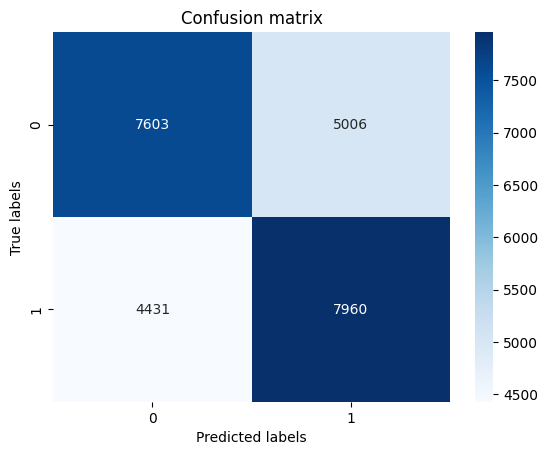

              precision    recall  f1-score   support

           0       0.63      0.60      0.62     12609
           1       0.61      0.64      0.63     12391

    accuracy                           0.62     25000
   macro avg       0.62      0.62      0.62     25000
weighted avg       0.62      0.62      0.62     25000



In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



# Define the XGBoost classifier
model = xgb.XGBClassifier(max_depth=4, n_estimators=100, gamma=0)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')


# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()



# Calculate the classification report
report = classification_report(y_test, y_pred_classes)

# Print the classification report
print(report)


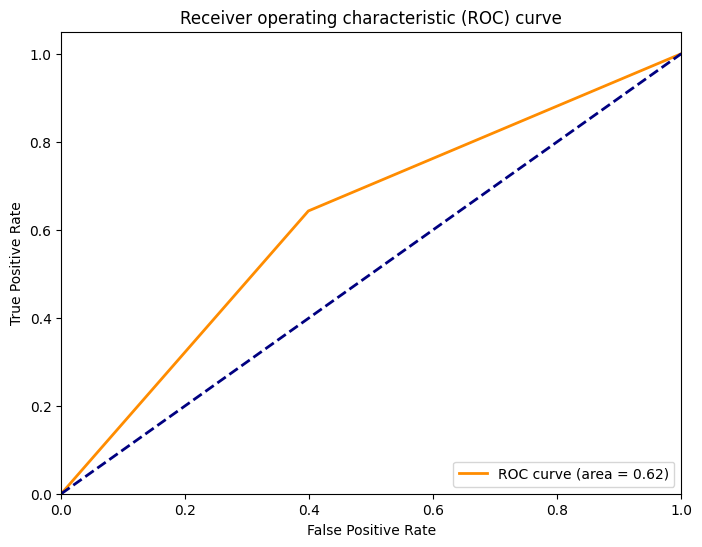

In [58]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


The test accuracy of the model is 62.3%

## Conclusion<a name="con"></a>

Based on the results obtained, the Random Forest classifier with 100 estimators and a maximum depth of 25 achieved an accuracy of 0.62 in predicting customer churn. While this accuracy is better than random guessing, it is not high enough to rely on this model solely for decision making.

The confusion matrix shows that the random classifier correctly predicted 7963 instances of true positives (TP) and 7584 instances of true negatives (TN), while incorrectly predicting 5025 instances of false positives (FP).XGBoost and Random classifier both had nearly same accuracy which is 62.3 % approximately.
Possible reasons for the lower accuracy could be due to the complexity of the problem and the need for more features to accurately predict churn. Additionally, the quality of the data may not be sufficient, or there may be some underlying factors that are not captured by the current features.

